
# Data Science and Business Analytics Internship-Dec20
#### GRIP @ The Sparks Foundation
### Task-7 : Stock Market Prediction using Numerical and Textual Analysis 
### Author: Abu Bakkar Siddikk
##### Batch: December-2020

In [74]:
# Import Neccessary Dependency
import pandas as pd 
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import lag_plot
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
import joblib
import warnings                      
warnings.filterwarnings("ignore")

In [8]:
# To Load the Dataset
df = pd.read_csv('BSESN.csv')

In [9]:
# to see the first five rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2001,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,03-01-2001,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,04-01-2001,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,05-01-2001,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,08-01-2001,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [4]:
# to see the shape of the dataset
df.shape

(4983, 7)

In [5]:
# to see the Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4983 non-null   object 
 1   Open       4908 non-null   float64
 2   High       4908 non-null   float64
 3   Low        4908 non-null   float64
 4   Close      4908 non-null   float64
 5   Adj Close  4908 non-null   float64
 6   Volume     4908 non-null   float64
dtypes: float64(6), object(1)
memory usage: 272.6+ KB


In [6]:
# To see the description of dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4.908000e+03
mean,18531.572344,18643.535393,18383.888463,18511.240145,18511.240145,8.041595e+04
std,11184.460183,11223.823507,11116.005421,11166.937682,11166.937682,1.068343e+06
min,2621.889893,2682.590088,2594.870117,2600.120117,2600.120117,0.000000e+00
25%,8688.065185,8780.207519,8588.082276,8697.120361,8697.120361,9.400000e+03
50%,17576.000000,17701.729495,17446.219730,17574.259765,17574.259765,1.390000e+04
75%,27219.376957,27329.972168,27022.117193,27191.658202,27191.658202,2.080000e+04
max,45891.039060,46164.101560,45792.011720,46103.500000,46103.500000,3.181510e+07


In [7]:
# check dataset is null value exists
df.isna().sum()

Date          0
Open         75
High         75
Low          75
Close        75
Adj Close    75
Volume       75
dtype: int64

In [8]:
# To Drop NULL values
df.dropna(inplace=True)

In [9]:
# check dataset is null value exists
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
# Check the correlation of dataset
corr = df.corr()

<AxesSubplot:>

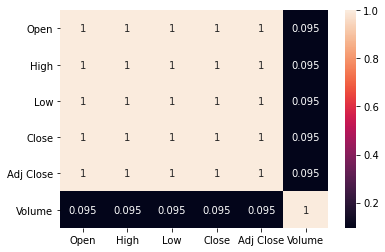

In [11]:
sns.heatmap(corr, annot=True)

In [12]:
# to see the column name of dataset
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
# Check the correlation of dataset
corr1 = df.corr()

<AxesSubplot:>

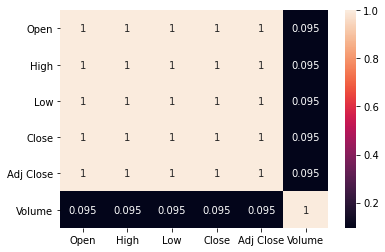

In [14]:
sns.heatmap(corr1, annot=True)

In [15]:
# To Add column as a'Date' in the index column
df.set_index('Date', inplace= True, drop = False)

In [16]:
# To see the first five rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
02-01-2001,02-01-2001,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
03-01-2001,03-01-2001,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
04-01-2001,04-01-2001,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
05-01-2001,05-01-2001,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
08-01-2001,08-01-2001,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


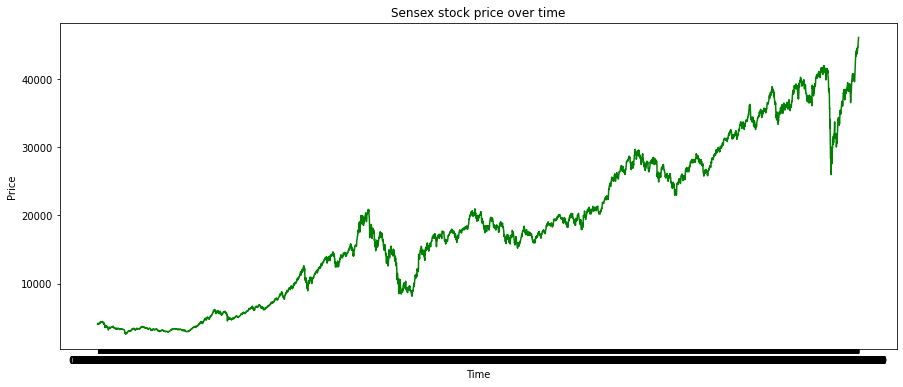

In [17]:
plt.figure(figsize=(15,6))
plt.plot(df.Close, 'green')
plt.title("Sensex stock price over time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [19]:
from datetime import datetime
from pandas_datareader.data import DataReader

t_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in t_list:   
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [21]:
c_list = [AAPL, GOOG, MSFT, AMZN]
c_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, co_name in zip(c_list, c_name):
    company["company_name"] = co_name
    
df = pd.concat(c_list, axis=0)

In [22]:
df

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2019-12-20,70.662498,69.639999,70.557503,69.860001,275978000.0,69.261856,APPLE
2019-12-23,71.062500,70.092499,70.132500,71.000000,98572000.0,70.392090,APPLE
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.459007,APPLE
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.856941,APPLE
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.829674,APPLE
...,...,...,...,...,...,...,...
2020-12-14,3190.469971,3126.000000,3143.000000,3156.969971,4155800.0,3156.969971,AMAZON
2020-12-15,3188.500000,3130.489990,3181.010010,3165.120117,3323700.0,3165.120117,AMAZON
2020-12-16,3247.000000,3163.679932,3176.010010,3240.959961,4427600.0,3240.959961,AMAZON


In [24]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,94.783671,92.100555,93.419068,93.511696,1.564282e+08,93.190121
std,21.389553,20.849392,21.298695,21.097456,7.137140e+07,21.238296
min,57.125000,53.152500,57.020000,56.092499,2.420510e+07,55.744217
25%,76.093750,74.630625,75.206877,75.769375,1.092296e+08,75.198429
50%,90.203751,87.803749,88.723751,89.062500,1.381294e+08,88.749096
75%,116.550003,113.580000,115.095003,115.057503,1.875871e+08,114.859341
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [26]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-12-20 to 2020-12-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    float64
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


In [27]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,1486.918691,1450.275548,1467.616827,1469.294819,1.895816e+06,1469.294819
std,170.124311,173.591207,171.657012,170.953657,7.780964e+05,170.953657
min,1071.319946,1013.536011,1056.510010,1056.619995,3.475000e+05,1056.619995
25%,1394.781219,1351.492493,1374.272522,1381.889954,1.395850e+06,1381.889954
50%,1482.205017,1450.244995,1464.690002,1465.214966,1.660750e+06,1465.214966
75%,1575.128723,1528.002502,1550.827515,1556.187531,2.165050e+06,1556.187531
max,1847.199951,1822.650024,1824.520020,1827.989990,4.329100e+06,1827.989990


In [29]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-12-20 to 2020-12-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 25.8+ KB


In [30]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,2675.182772,2601.223491,2639.499962,2639.440275,4.951281e+06,2639.440275
std,564.179731,547.263622,560.027702,554.574766,1.978955e+06,554.574766
min,1759.449951,1626.030029,1641.510010,1676.609985,8.813000e+05,1676.609985
25%,2056.155029,2017.087524,2040.765015,2042.940002,3.504950e+06,2042.940002
50%,2718.675049,2664.000000,2684.785034,2686.625000,4.537000e+06,2686.625000
75%,3194.152405,3120.005005,3165.722473,3156.339905,5.846450e+06,3156.339905
max,3552.250000,3486.689941,3547.000000,3531.449951,1.556730e+07,3531.449951


In [31]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-12-20 to 2020-12-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 25.8+ KB


In [32]:
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,193.505675,188.476547,190.990278,191.100079,3.774109e+07,190.106038
std,22.827892,23.267426,23.184633,23.088564,1.699832e+07,23.450463
min,140.570007,132.520004,137.009995,135.419998,8.989200e+06,134.366470
25%,174.037502,168.982506,171.892498,171.287498,2.626408e+07,169.954914
50%,199.589996,194.625000,196.489998,197.339996,3.280485e+07,196.350060
75%,214.012505,208.912502,211.497505,211.339996,4.413258e+07,210.575840
max,232.860001,227.350006,229.270004,231.649994,9.707360e+07,231.045105


In [33]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-12-20 to 2020-12-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          252 non-null    float64
 1   Low           252 non-null    float64
 2   Open          252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    float64
 5   Adj Close     252 non-null    float64
 6   company_name  252 non-null    object 
dtypes: float64(6), object(1)
memory usage: 25.8+ KB


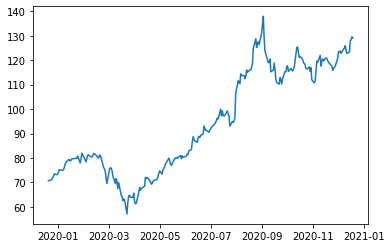

In [36]:
plt.plot(AAPL.High)

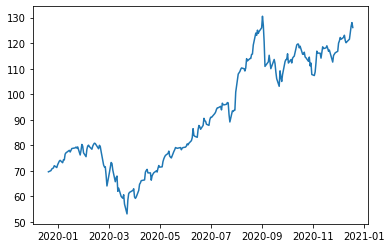

In [38]:
plt.plot(AAPL.Low)

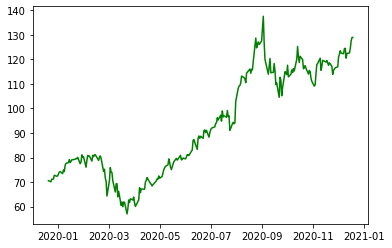

In [60]:
plt.plot(AAPL.Open, c='green')

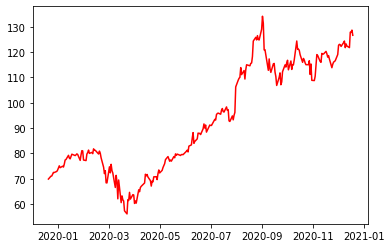

In [59]:
plt.plot(AAPL.Close, c='red')

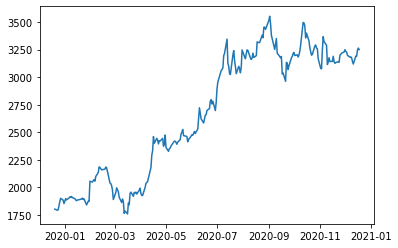

In [42]:
plt.plot(AMZN.High)

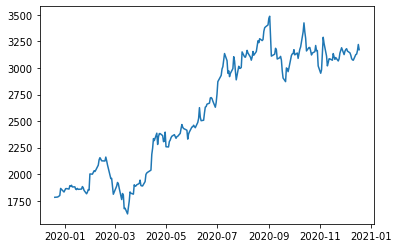

In [43]:
plt.plot(AMZN.Low)

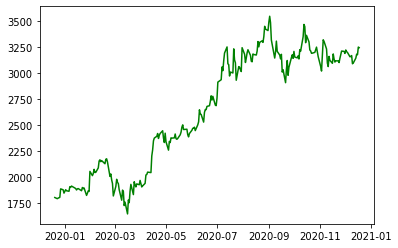

In [57]:
plt.plot(AMZN.Open, c='green')

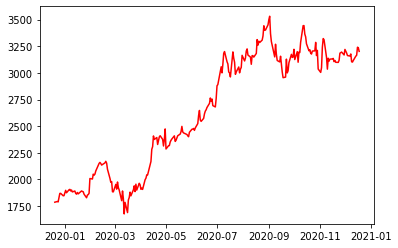

In [58]:
plt.plot(AMZN.Close, c='red')

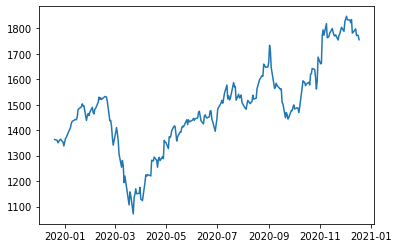

In [46]:
plt.plot(GOOG.High)

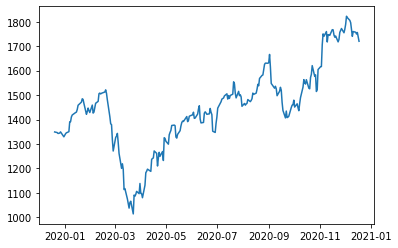

In [56]:
plt.plot(GOOG.Low)

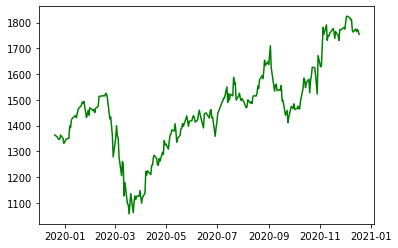

In [54]:
plt.plot(GOOG.Open, c='green')

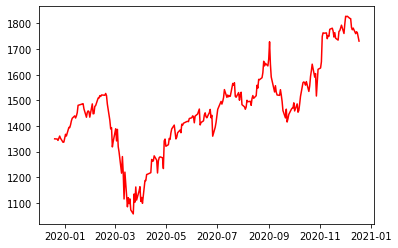

In [53]:
plt.plot(GOOG.Close, c="red")

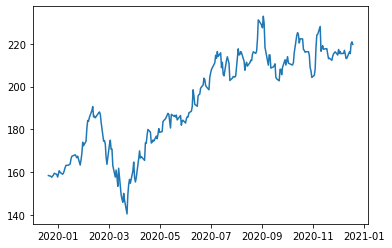

In [62]:
plt.plot(MSFT.High)

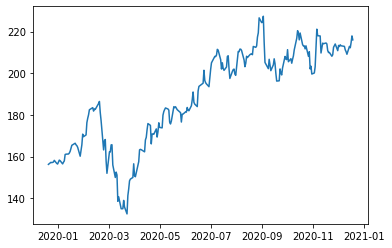

In [63]:
plt.plot(MSFT.Low)

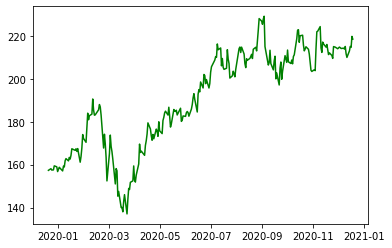

In [64]:
plt.plot(MSFT.Open, c='green')

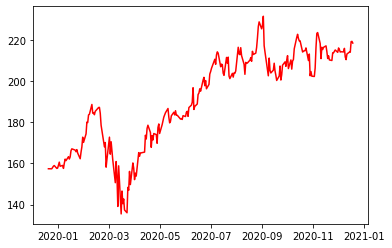

In [65]:
plt.plot(MSFT.Close, c='red')

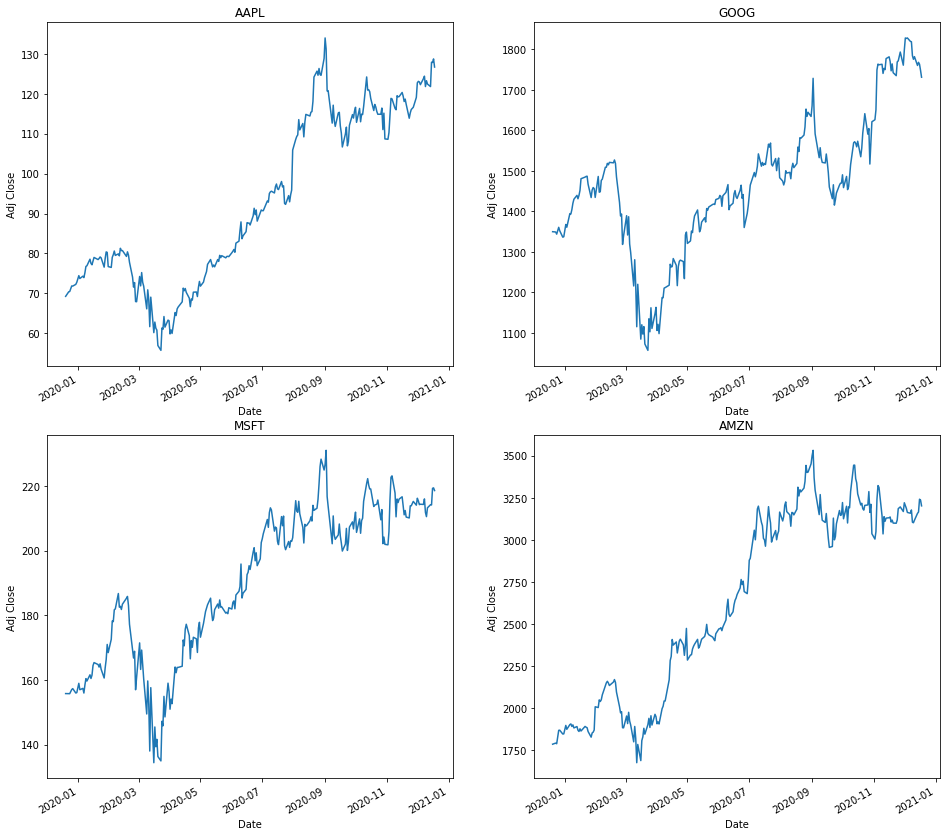

In [76]:
plt.figure(figsize=(16, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(c_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('Date')
    plt.title(f"{t_list[i - 1]}")

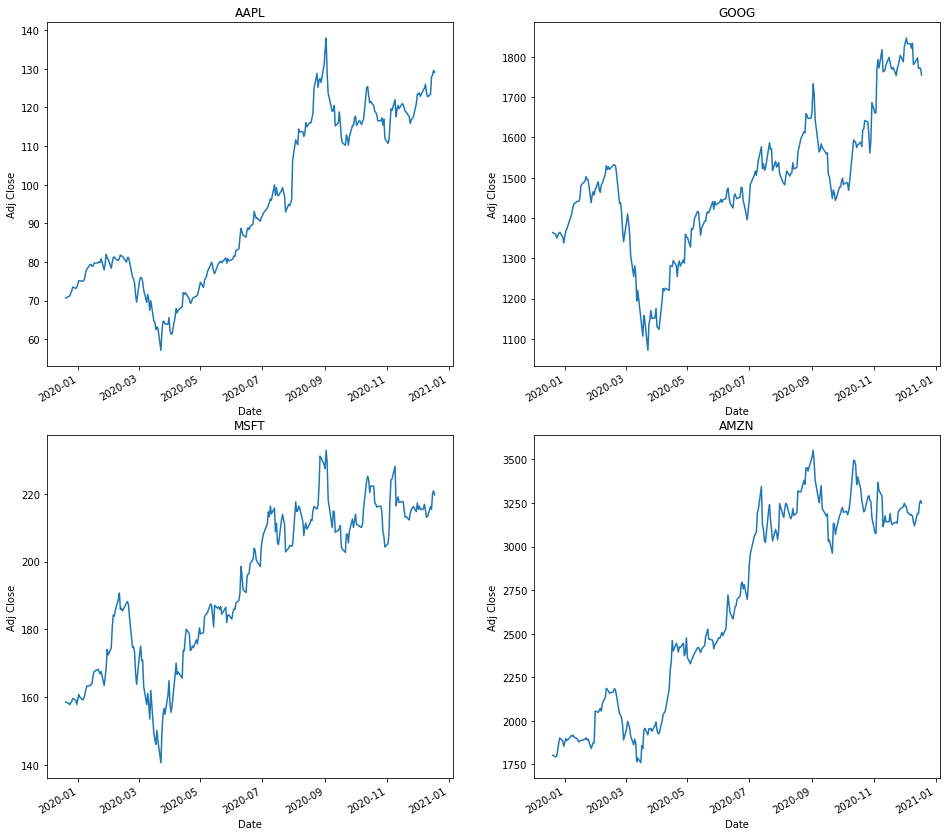

In [77]:
plt.figure(figsize=(16, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(c_list, 1):
    plt.subplot(2, 2, i)
    company['High'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('Date')
    plt.title(f"{t_list[i - 1]}")

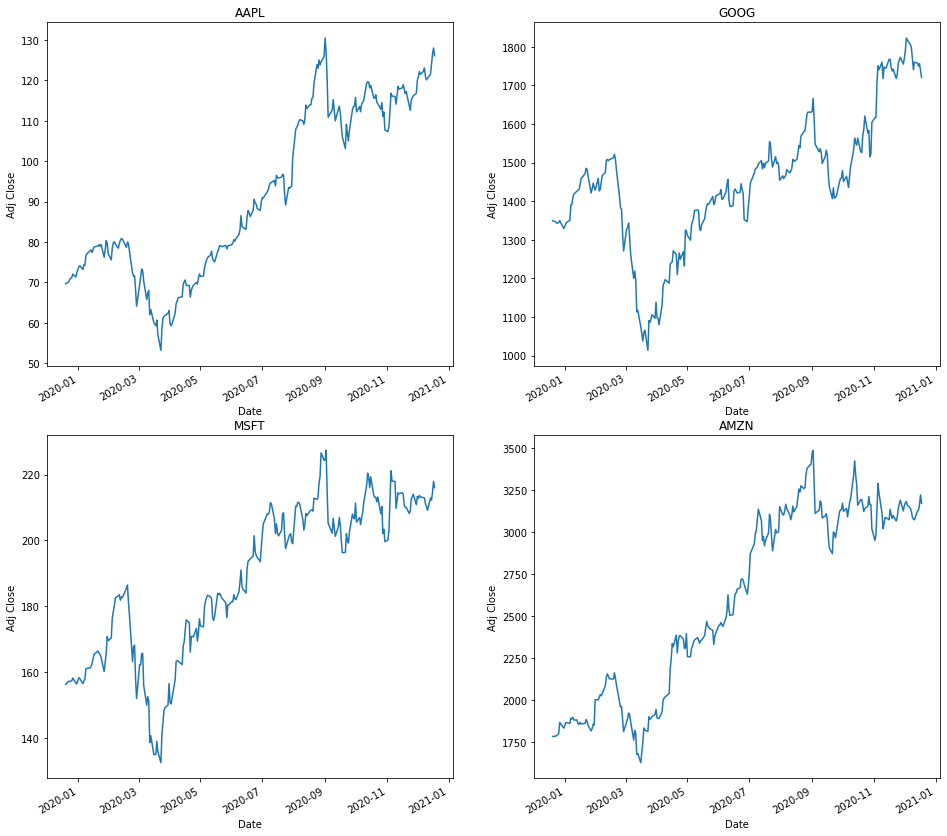

In [78]:
plt.figure(figsize=(16, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(c_list, 1):
    plt.subplot(2, 2, i)
    company['Low'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel('Date')
    plt.title(f"{t_list[i - 1]}")

company_name
APPLE    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

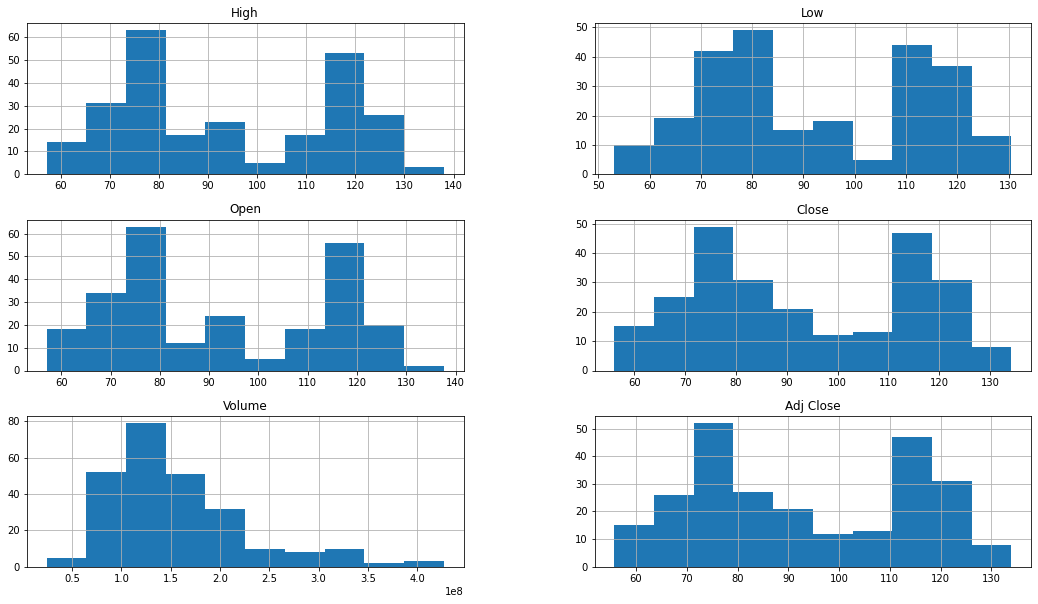

In [79]:
AAPL.groupby("company_name").hist(figsize=(18, 10))

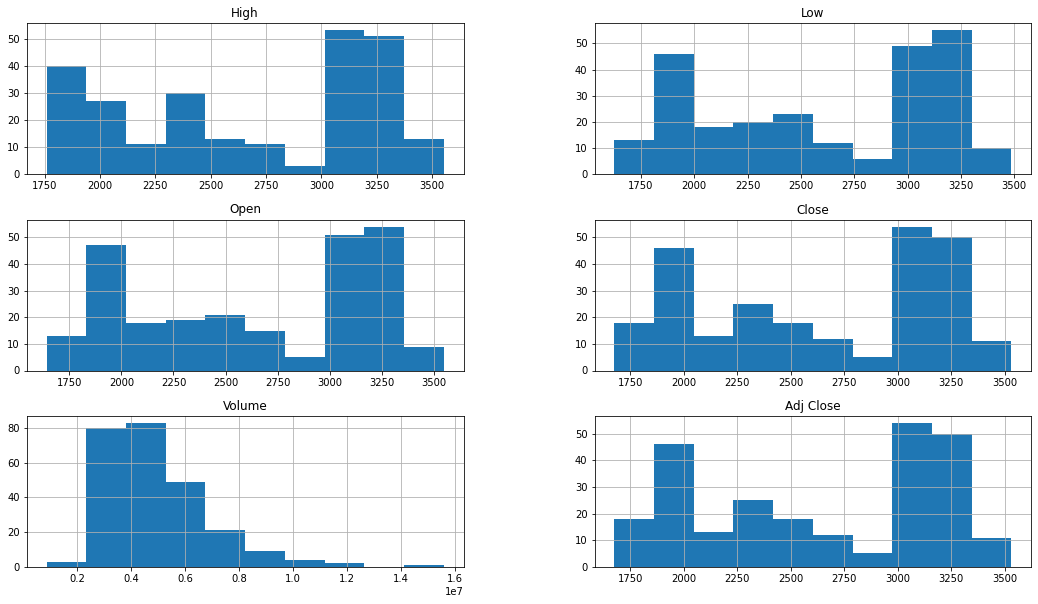

In [80]:
AMZN.groupby("company_name").hist(figsize=(18, 10));

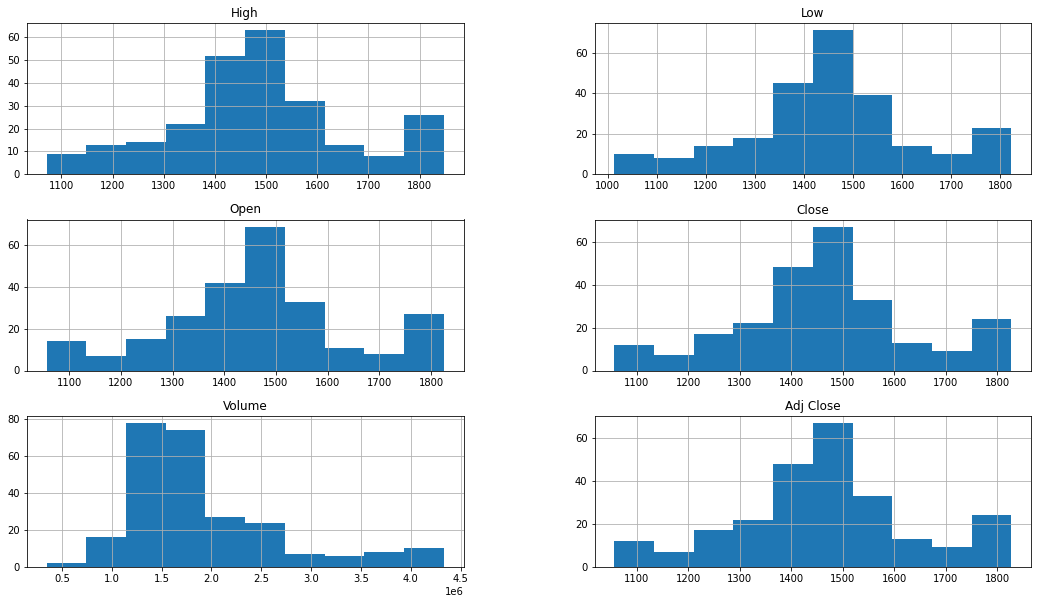

In [81]:
GOOG.groupby("company_name").hist(figsize=(18, 10));

company_name
MICROSOFT    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

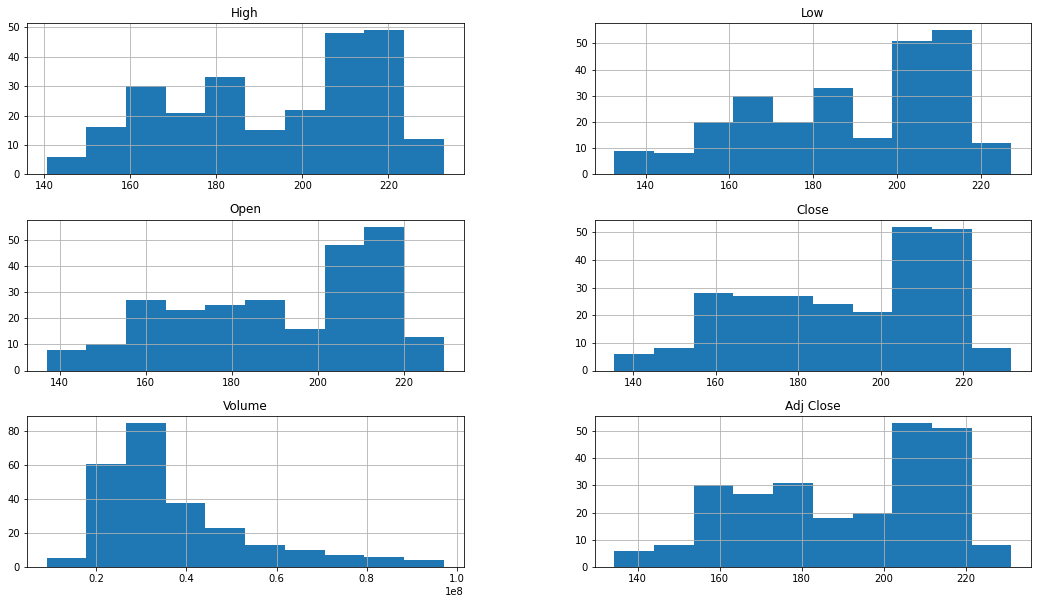

In [82]:
MSFT.groupby("company_name").hist(figsize=(18, 10))

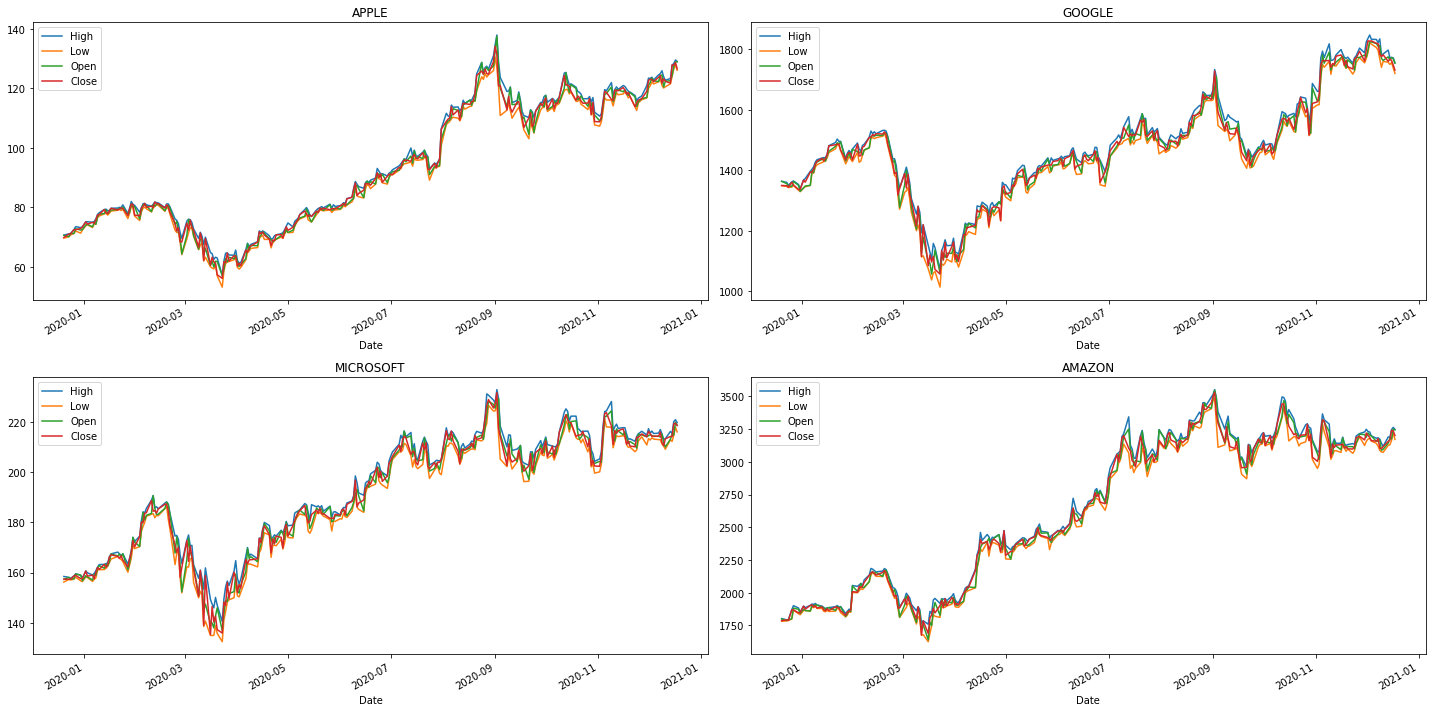

In [89]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(20)

AAPL[['High', 'Low', 'Open', 'Close']].plot(ax=ax[0,0])
ax[0,0].set_title('APPLE')

GOOG[['High', 'Low', 'Open', 'Close']].plot(ax=ax[0,1])
ax[0,1].set_title('GOOGLE')

MSFT[['High', 'Low', 'Open', 'Close']].plot(ax=ax[1,0])
ax[1,0].set_title('MICROSOFT')

AMZN[['High', 'Low', 'Open', 'Close']].plot(ax=ax[1,1])
ax[1,1].set_title('AMAZON')
fig.tight_layout()

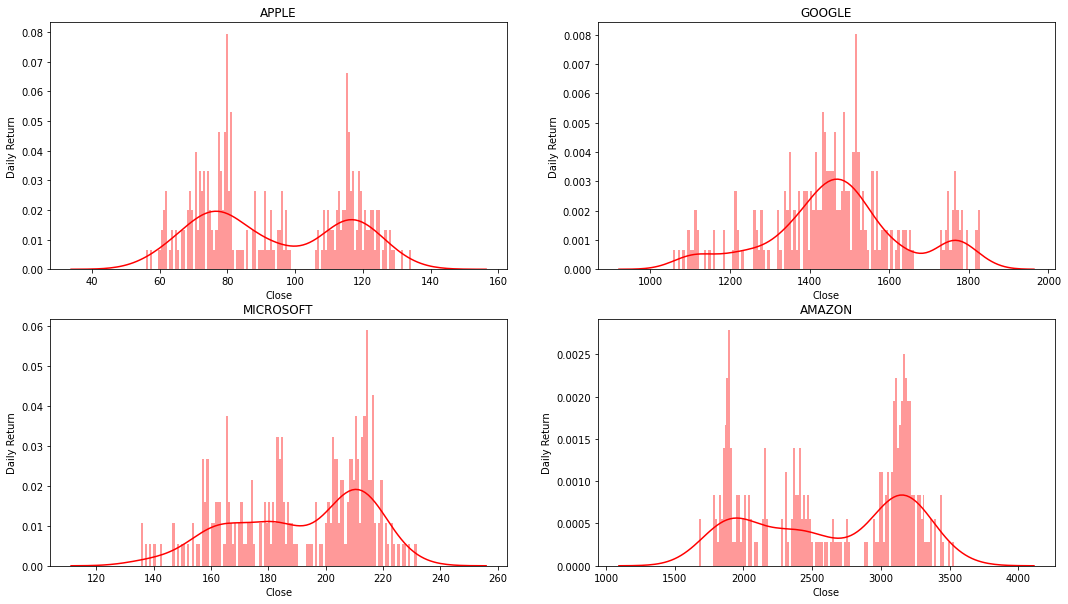

In [95]:
plt.figure(figsize=(18, 10))

for i, company in enumerate(c_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Close'].dropna(), bins=130, color='red')
    plt.ylabel('Daily Return')
    plt.title(f'{c_name[i - 1]}')

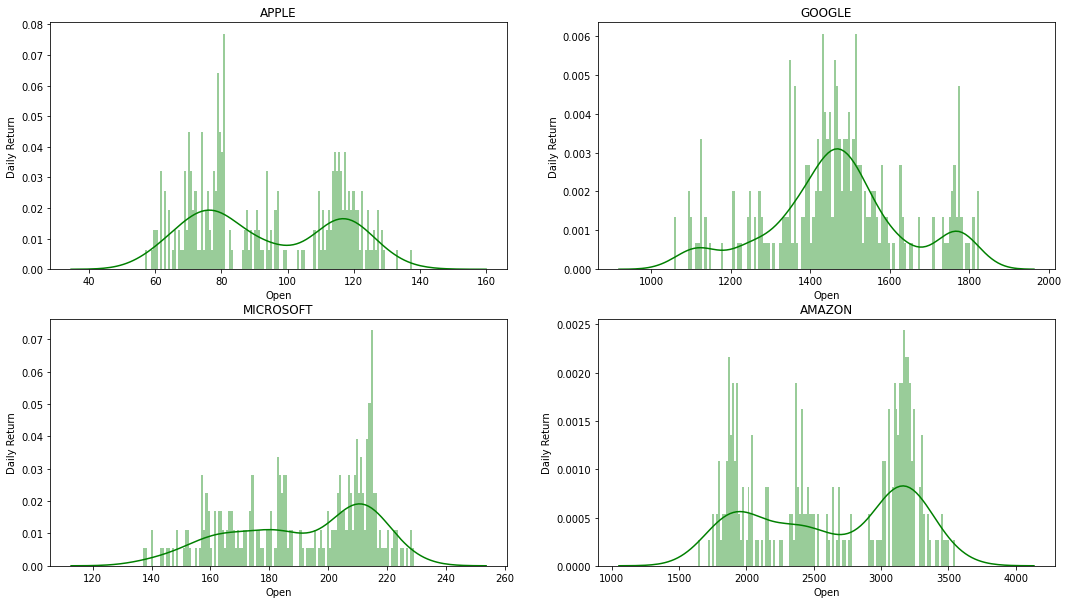

In [96]:
plt.figure(figsize=(18, 10))

for i, company in enumerate(c_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Open'].dropna(), bins=130, color='green')
    plt.ylabel('Daily Return')
    plt.title(f'{c_name[i - 1]}')

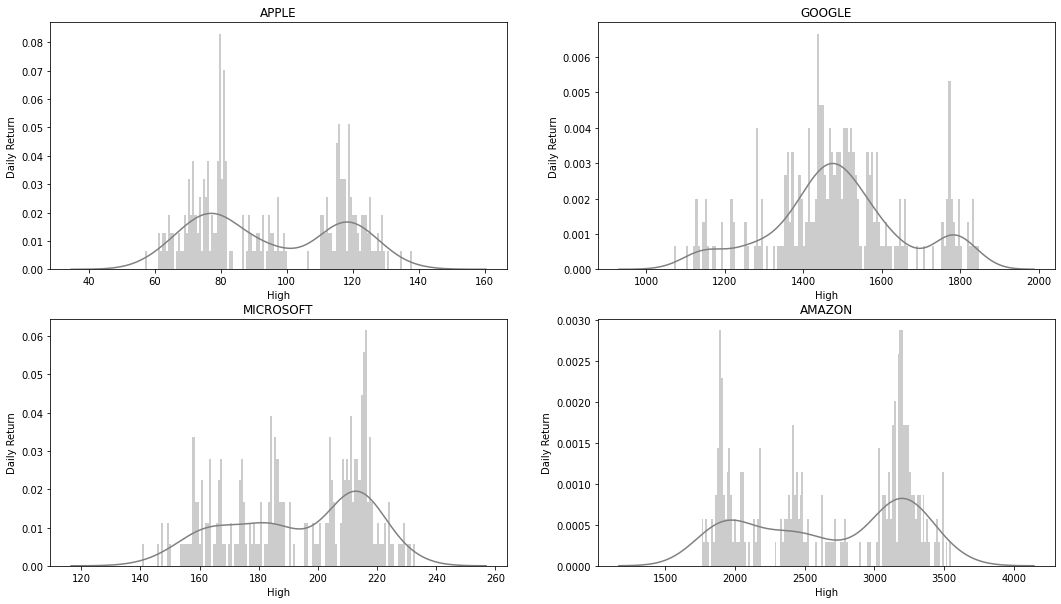

In [98]:
plt.figure(figsize=(18, 10))

for i, company in enumerate(c_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['High'].dropna(), bins=130, color='gray')
    plt.ylabel('Daily Return')
    plt.title(f'{c_name[i - 1]}')

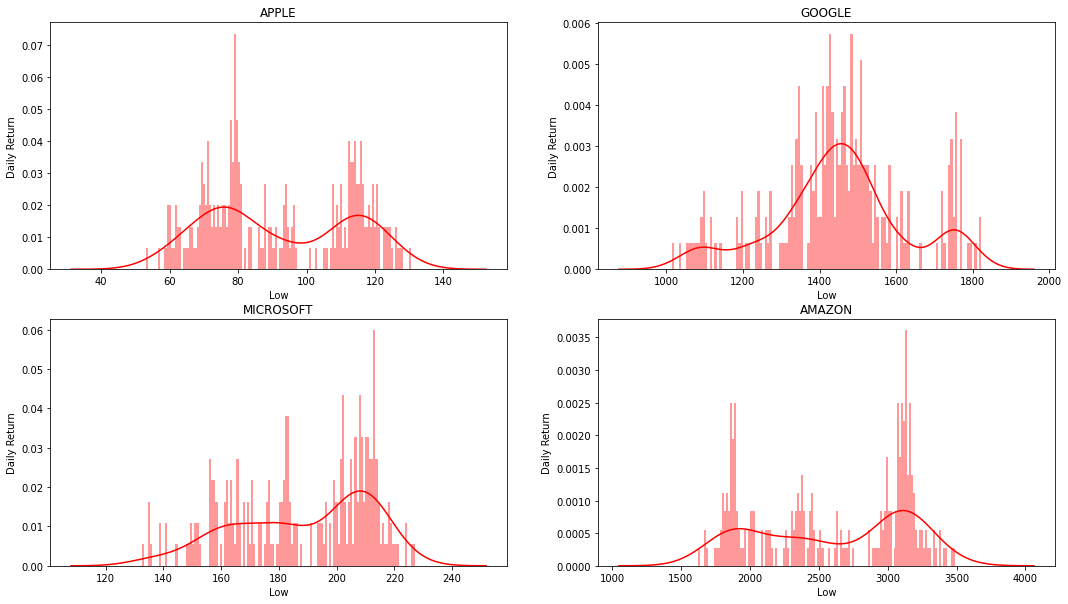

In [99]:
plt.figure(figsize=(18, 10))

for i, company in enumerate(c_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Low'].dropna(), bins=130, color='red')
    plt.ylabel('Daily Return')
    plt.title(f'{c_name[i - 1]}')

# To Reading Indian News Headlines data

In [21]:
# To read news headlines dataset
dfn = pd.read_csv('india-news-headlines.csv')

In [22]:
# to read the top five rows
dfn.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [10]:
#Find out total numbers of records in both the datasets
print("Amazon Stocks Total records: {}".format(len(df)))
print("Indian News Headline Total records: {}".format(len(dfn)))

Amazon Stocks Total records: 4983
Indian News Headline Total records: 3297172


# Data pre-processing for Stock market dataset

In [11]:
df = df.drop_duplicates()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2001,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,03-01-2001,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,04-01-2001,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,05-01-2001,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,08-01-2001,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [12]:
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-02-01,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-03-01,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-04-01,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-05-01,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-08-01,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0
...,...,...,...,...,...,...,...
4978,2020-03-12,44902.019530,44953.011720,44551.421880,44632.648440,44632.648440,30700.0
4979,2020-04-12,44665.910160,45148.281250,44665.910160,45079.550780,45079.550780,27600.0
4980,2020-07-12,45099.921880,45458.921880,45024.468750,45426.968750,45426.968750,18700.0
4981,2020-08-12,45568.800780,45742.230470,45335.171880,45608.511720,45608.511720,18200.0


In [13]:
df = df.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])
df

,Date,Close,Open,High,Low,Volume
0,2001-02-01,4018.879883,3953.219971,4028.570068,3929.370117,0.0
1,2001-03-01,4060.020020,3977.580078,4067.659912,3977.580078,0.0
2,2001-04-01,4115.370117,4180.970215,4180.970215,4109.549805,0.0
3,2001-05-01,4183.729980,4116.339844,4195.009766,4115.350098,0.0
4,2001-08-01,4120.430176,4164.759766,4206.720215,4101.529785,0.0
...,...,...,...,...,...,...
4978,2020-03-12,44632.648440,44902.019530,44953.011720,44551.421880,30700.0
4979,2020-04-12,45079.550780,44665.910160,45148.281250,44665.910160,27600.0
4980,2020-07-12,45426.968750,45099.921880,45458.921880,45024.468750,18700.0
4981,2020-08-12,45608.511720,45568.800780,45742.230470,45335.171880,18200.0


In [14]:
df.set_index('Date', inplace= True)
df

,Close,Open,High,Low,Volume
Date,,,,,
2001-02-01,4018.879883,3953.219971,4028.570068,3929.370117,0.0
2001-03-01,4060.020020,3977.580078,4067.659912,3977.580078,0.0
2001-04-01,4115.370117,4180.970215,4180.970215,4109.549805,0.0
2001-05-01,4183.729980,4116.339844,4195.009766,4115.350098,0.0
2001-08-01,4120.430176,4164.759766,4206.720215,4101.529785,0.0
...,...,...,...,...,...
2020-03-12,44632.648440,44902.019530,44953.011720,44551.421880,30700.0
2020-04-12,45079.550780,44665.910160,45148.281250,44665.910160,27600.0
2020-07-12,45426.968750,45099.921880,45458.921880,45024.468750,18700.0


In [15]:
df = df.sort_index(ascending=True, axis=0)
df

,Close,Open,High,Low,Volume
Date,,,,,
2001-01-02,4286.109863,4303.129883,4355.390137,4230.169922,0.0
2001-01-03,4271.649902,4288.229980,4386.979980,4215.270020,0.0
2001-01-05,NaN,NaN,NaN,NaN,NaN
2001-01-06,3557.639893,3637.030029,3651.320068,3555.739990,0.0
2001-01-08,3284.169922,3335.000000,3346.209961,3276.719971,0.0
...,...,...,...,...,...
2020-12-05,31371.119140,31342.929690,31536.890630,30844.660160,23100.0
2020-12-06,33780.890630,32436.689450,33856.269530,32348.099610,23000.0
2020-12-08,38369.628910,38321.128910,38414.371090,38125.808590,25300.0


# Data Pre-Processing dor Indian Headline News

In [23]:
# dropping duplicates
dfn = dfn.drop_duplicates()
dfn

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [24]:
dfn['publish_date'] = dfn['publish_date'].astype(str)
dfn['publish_date'] = dfn['publish_date'].apply(lambda x: x[0:4]+'/'+x[4:6]+'/'+x[6:8])
dfn

,publish_date,headline_category,headline_text
0,2001/01/01,sports.wwe,win over cena satisfying but defeating underta...
1,2001/01/02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001/01/02,unknown,Fissures in Hurriyat over Pak visit
3,2001/01/02,unknown,America's unwanted heading for India?
4,2001/01/02,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,2020/06/30,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,2020/06/30,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,2020/06/30,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,2020/06/30,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [25]:
dfn['publish_date'] = pd.to_datetime(dfn['publish_date']).dt.normalize()
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3275587 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 100.0+ MB


In [26]:
dfn = dfn.filter(['publish_date', 'headline_text'])

In [27]:
dfn = dfn.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

In [28]:
dfn.set_index('publish_date', inplace= True)

In [29]:
dfn = dfn.sort_index(ascending=True, axis=0)

In [32]:
# To Rename column name headline_text to Text
dfn.rename(columns={'headline_text':'Text'}, inplace=True)
dfn.head()

,Text
publish_date,
2001-01-01,win over cena satisfying but defeating underta...
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...


# Concanate Two Dataset in order to create one dataset

In [33]:
df = pd.concat([df, dfn], axis=1)
df.dropna(axis=0, inplace=True)
df.head()

,Close,Open,High,Low,Volume,Text
2001-01-02,4286.109863,4303.129883,4355.390137,4230.169922,0.0,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,4271.649902,4288.229980,4386.979980,4215.270020,0.0,"Powerless north India gropes in the dark,Think..."
2001-01-06,3557.639893,3637.030029,3651.320068,3555.739990,0.0,Light combat craft takes India into club class...
2001-01-08,3284.169922,3335.000000,3346.209961,3276.719971,0.0,"Sangh Parivar; Babri panel up the ante,Frontru..."
2001-01-10,2795.300049,2817.739990,2822.770020,2773.030029,0.0,"Fend for yourselves; Pande tells doctors,Burea..."


#  Sentiment Analysis using concanate Dataset

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
import nltk

In [37]:
# Create Instant of SentimentIntensityAnalyzer
SIA= SentimentIntensityAnalyzer()

In [52]:
# To calculating sentiment scores..........
df['Compound'] = df['Text'].apply(lambda x: SIA.polarity_scores(x)['compound'])
df['Negative'] = df['Text'].apply(lambda x: SIA.polarity_scores(x)['neg'])
df['Neutral'] = df['Text'].apply(lambda x: SIA.polarity_scores(x)['neu'])
df['Positive'] = df['Text'].apply(lambda x: SIA.polarity_scores(x)['pos'])

In [53]:
df.head(5)

,Close,Open,High,Low,Volume,Text,Compound,Negative,Neutral,Positive
2001-01-02,4286.109863,4303.129883,4355.390137,4230.169922,0.0,Status quo will not be disturbed at Ayodhya; s...,-0.9621,0.119,0.817,0.064
2001-01-03,4271.649902,4288.229980,4386.979980,4215.270020,0.0,"Powerless north India gropes in the dark,Think...",0.6322,0.084,0.817,0.098
2001-01-06,3557.639893,3637.030029,3651.320068,3555.739990,0.0,Light combat craft takes India into club class...,0.2732,0.129,0.711,0.160
2001-01-08,3284.169922,3335.000000,3346.209961,3276.719971,0.0,"Sangh Parivar; Babri panel up the ante,Frontru...",-0.9638,0.119,0.855,0.026
2001-01-10,2795.300049,2817.739990,2822.770020,2773.030029,0.0,"Fend for yourselves; Pande tells doctors,Burea...",-0.5719,0.227,0.773,0.000


In [54]:
df.drop(['Text'], inplace=True, axis=1)

In [55]:
df = df[['Close', 'Compound', 'Negative', 'Neutral', 'Positive', 'Open', 'High', 'Low', 'Volume']]

In [56]:
df.head()

,Close,Compound,Negative,Neutral,Positive,Open,High,Low,Volume
2001-01-02,4286.109863,-0.9621,0.119,0.817,0.064,4303.129883,4355.390137,4230.169922,0.0
2001-01-03,4271.649902,0.6322,0.084,0.817,0.098,4288.229980,4386.979980,4215.270020,0.0
2001-01-06,3557.639893,0.2732,0.129,0.711,0.160,3637.030029,3651.320068,3555.739990,0.0
2001-01-08,3284.169922,-0.9638,0.119,0.855,0.026,3335.000000,3346.209961,3276.719971,0.0
2001-01-10,2795.300049,-0.5719,0.227,0.773,0.000,2817.739990,2822.770020,2773.030029,0.0


In [57]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df = pd.DataFrame(sc.fit_transform(df))
df.columns = df.columns
df.index = df.index
df.head()

,0,1,2,3,4,5,6,7,8
0,0.039690,0.01895,0.268018,0.699013,0.105263,0.039764,0.039392,0.038870,0.0
1,0.039349,0.81610,0.189189,0.699013,0.161184,0.039412,0.040136,0.038516,0.0
2,0.022541,0.63660,0.290541,0.524671,0.263158,0.024010,0.022812,0.022839,0.0
3,0.016103,0.01810,0.268018,0.761513,0.042763,0.016866,0.015627,0.016207,0.0
4,0.004595,0.21405,0.511261,0.626645,0.000000,0.004632,0.003301,0.004235,0.0


In [60]:
X = df.loc[:,1:]
y = df.loc[:,0]

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)
x_train.shape

(2861, 8)

In [64]:
RFC = RandomForestRegressor()
RFC.fit(x_train, y_train)
prediction=RFC.predict(x_test)

In [66]:
prediction[:10]

array([0.06141719, 0.05506962, 0.77667362, 0.54621848, 0.65222741,
       0.20183599, 0.33650789, 0.74472638, 0.59896208, 0.48416601])

In [71]:
Score = RFC.score(x_test, y_test)
print(f'Score: {round(Score)}')

Score: 1.0


In [72]:
print(y_test[:10])

538     0.061813
668     0.053843
4273    0.775626
3614    0.544808
3998    0.652598
1277    0.202059
2154    0.334531
4188    0.739432
3484    0.599627
3704    0.479665
Name: 0, dtype: float64


In [73]:
print(mean_squared_error(prediction,y_test))

8.09596207345789e-06


In [75]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
predictions = DTR.predict(x_test)

In [76]:
predictions

array([0.06107685, 0.05663871, 0.77736495, ..., 0.11073195, 0.90252148,
       0.05105482])

# Thank You All